# PLAICraft Planning Report
#### By: Sarah Mogga
## Introduction

The following proposal is based on the data provided by the PLAI, a research group based in the Computer Science department at the University of British Columbia. Their main research revolves around building and developing generative AI that is reliable and safe. In their current research they aim to build an embodied AI. This particular AI has the capacity to interact in complex environments and respond to speech. 

In order to train the embodied AI, PLAI has created a mock minecraft world (called “PLAICraft”) to collect behavioural data of players then use it to train and enhance their AI model. In order to concentrate their recruitment effort, the PLAI research group has posed the question of which “kinds” of player are most likely to contribute large amounts of data. 

In this report I will be analysing the provided data from PLAI to understand the various demographics of player and draw a conclusion from such. 





In [2]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(RColorBrewer)
options(repr.matrix.max.rows = 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Dataset 1: players.csv

PLAI provided two different datasets, the first is called “players.csv”. The dataset collected the individual information of each player and in total collected 196 observation, categorising it into the seven following variables:


**experience** - how much prior experience an player has with playing minecraft (categorical)

**subscribe** - an indicator of weather or not the player is subscribed to the PLAIcraft newsletter (logical vector)

**hashedEmail** - the email provided by the player (categorical)

**played_hours** - total hours the player spent on minecraft (numerical)

**name** - the name of the player (categorical)

**gender** - gender of the player (categorical)

**age** - age of the player (numerical)

The initial print of the players.csv came out tidy, with no overlapping or combined variables in any columns. 


In [ ]:
player_data <- read_csv("data/players.csv")

player_data <- player_data|>
             mutate(gender = as_factor(gender))|>
             mutate(experience = as_factor(experience))|>
             mutate(subscribe = as_factor(subscribe))
player_data

In [32]:
glimpse(player_data)

nrow_pd <- nrow(player_data)
player_data |>
  group_by(gender) |>
  summarize(
    count = n(), 
    percentage = n() / nrow_pd * 100)


nrow_pd2 <- nrow(player_data)
player_data |>
  group_by(experience) |>
  summarize(
    count = n(),
    percentage = n() / nrow_pd2 * 100)

Rows: 196
Columns: 7
$ experience   <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateur, Regular…
$ subscribe    <fct> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <fct> Male, Male, Male, Female, Male, Female, Female, Male, Mal…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…


gender,count,percentage
<fct>,<int>,<dbl>
Male,124,63.2653061
Female,37,18.8775510
Non-binary,15,7.6530612
Prefer not to say,11,5.6122449
Agender,2,1.0204082
Two-Spirited,6,3.0612245
Other,1,0.5102041


experience,count,percentage
<fct>,<int>,<dbl>
Pro,14,7.142857
Veteran,48,24.489796
Amateur,63,32.142857
Regular,36,18.367347
Beginner,35,17.857143


In [ ]:
player_ages <- summarize(player_data,
          player_age_min = min(Age, na.rm = TRUE),
          player_age_max = max(Age, na.rm = TRUE),
          player_age_mean = mean(Age, na.rm = TRUE))
player_ages

hours_played <- summarize(player_data,
          hours_played_min = min(played_hours, na.rm = TRUE),
          hours_played_max = max(played_hours, na.rm = TRUE),
          hours_played_mean = mean(played_hours, na.rm = TRUE))
hours_played

## Summary Stats
Below are the summary statistics of each variable that will be analysed in the proposal.
| Variable   | Max                |   Min              |        Mean         |
|------------|--------------------|--------------------|---------------------|
| hours_played | 223.1	|0| 5.845918|
| age |50 | 8| 20.52062| 


| Gender  | Count            |  Percentage             |  
|------------|--------------------|--------------------|
| Male | 124	|63%| 
| Female | 37 |19%|
| Non-Binary | 15	|8%|
| Prefer not to say |11|6%|
| Agender | 2	|1%|
| Two-Spirited | 6|3%|
| Other| 1	|1%|


| Experience  | Count            |  Percentage         |  
|------------|--------------------|--------------------|
| Pro | 14|7%| 
| Veteran| 48|24%|
| Amateur | 63	|32%|
| Regular|36|18%|
|Beginner| 35	|18%|

Note: variables hashedEmail and name are not relevant for this analysis

### Dataset 2: sessions.csv

The second dataset is called session.csv which contains the information regarding the duration and date of each players “playing hours”. The data has recorded 1535 observations, organizing such into the five following columns. 

**hashedEmail** - the email route of each player

**start_time** - beginning of the players session

**end_time** - end of the players session 

**original_start_time** - time of computer since january 1st 1970 (UTC)

**original_end_time** - time of computer since January 1st 1970 (UTC)

Unlike the players dataset this dataset is not tidy. The date is combined in the start_time and the end_time columns. Additionally it is saved as characters rather than integers, making it difficult for future plotting in its current state.


In [35]:
sessions_data <- read_csv("data/sessions.csv")

sessions_num <- nrow(sessions_data)
sessions_num
sessions <- sessions_data |>
    mutate(start_time = dmy_hm(start_time)) |>
    mutate(end_time = dmy_hm(end_time)) 


glimpse(sessions_data)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 1535

Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…


In [ ]:

session_time_strt <- summarize(sessions,
          session_stime_min = min(start_time, na.rm = TRUE),
          session_stime_max = max(start_time, na.rm = TRUE),
          session_stime_mean = mean(start_time, na.rm = TRUE))       
session_time_strt


session_time_end <- summarize(sessions,
          session_etime_min = min(end_time, na.rm = TRUE),
          session_etime_max = max(end_time, na.rm = TRUE),
          session_etime_mean = mean(end_time, na.rm = TRUE))       
session_time_end


### Summary Stats

The mean, maximum, and minimum were calculated for both start_time and end_time. Values in the “original_x” columns were irrelevant for the analysis.


| Session    | Max                |   Min              |        Mean         |
|------------|--------------------|--------------------|---------------------|
| start_time | 2024-09-26 06:09:00|2024-04-06 09:27:00 | 2024-06-24 03:54:03 |
| end_time   |2024-09-26 07:39:00 | 2024-04-06 09:31:00| 2024-06-24 02:26:18 |

Note: This dataset will not be used in the analysis

### Question:

In regards to the observations made and the general inquiry posed by PLAI, I aim to answer the question:

**Can player information provided by PLAI (Age, Gender, Subscription, Experience) act as indicators for which players will be the most dedicated to playing PLAICraft, which in turn provides adequate amounts of data?**

**Reworked: Can an individual's played time predict their gender and age?**



## Visualisation

I will be plotting the data into both scatter plots and graphs. The use of scatterplpots will note how age may relate to each of the variables on the x-axis and overall it's impact on the playing hours noted in the y-axis. While the bar graphs will compare and contrast the prevalence of each *chosen variable* in regards to played hours.   

*chosen variables* = Age, Gender, Experience, Subscription

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“The shape palette can deal with a maximum of 6 discrete values because more
than 6 becomes difficult to discriminate
ℹ you have requested 7 values. Consider specifying shapes manually if you need
  that many have them.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


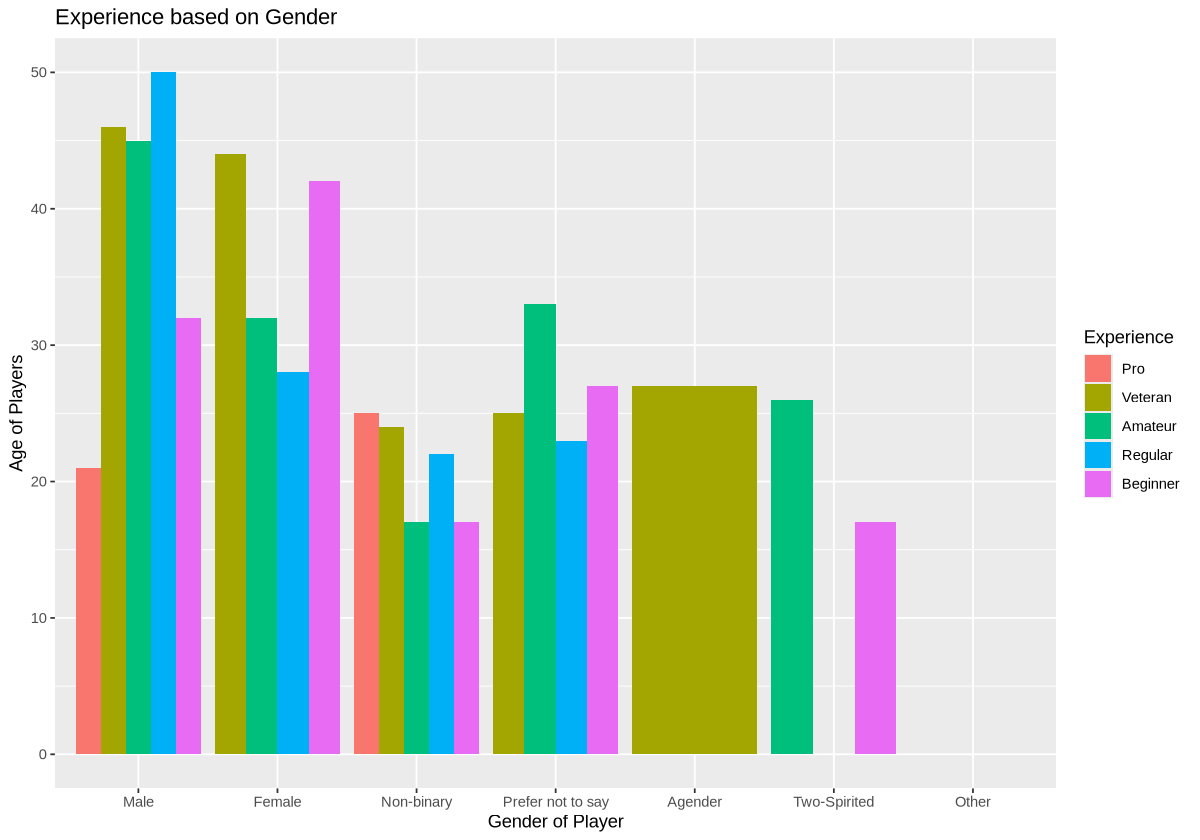

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


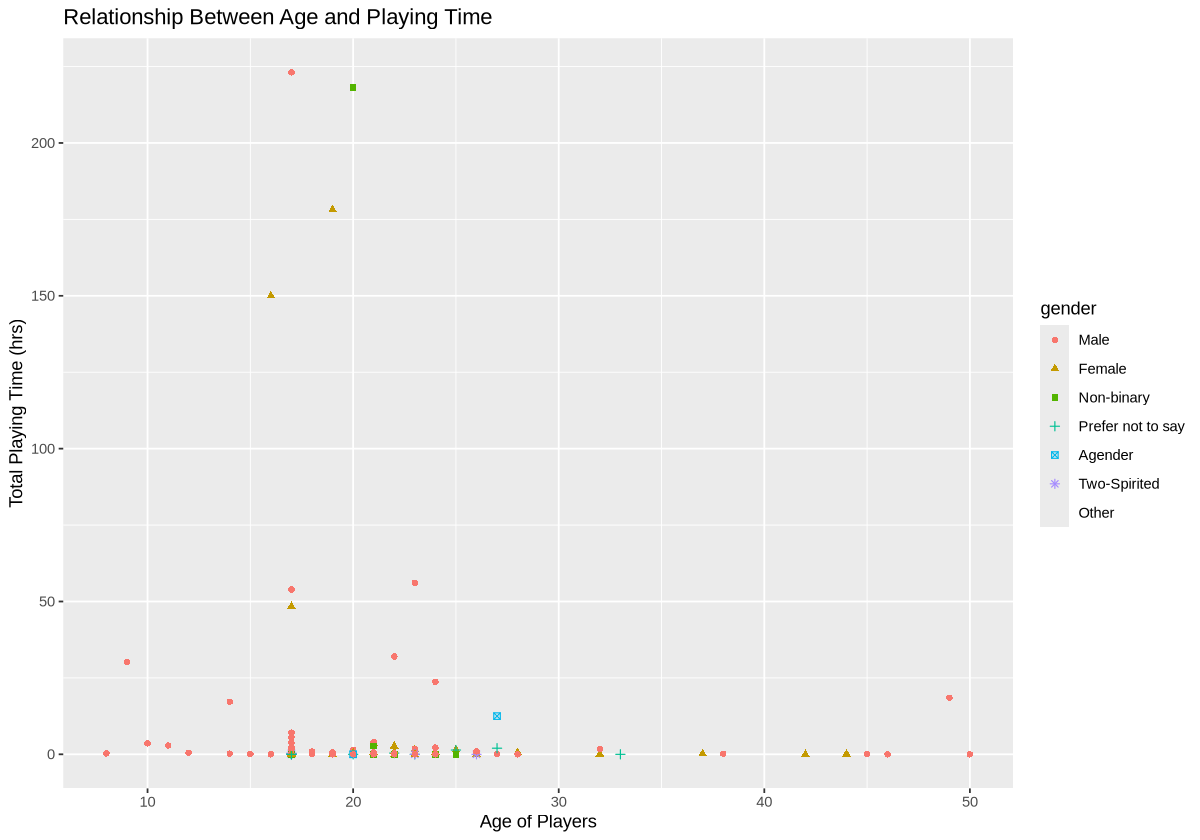

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because more
than 6 becomes difficult to discriminate
ℹ you have requested 7 values. Consider specifying shapes manually if you need
  that many have them.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


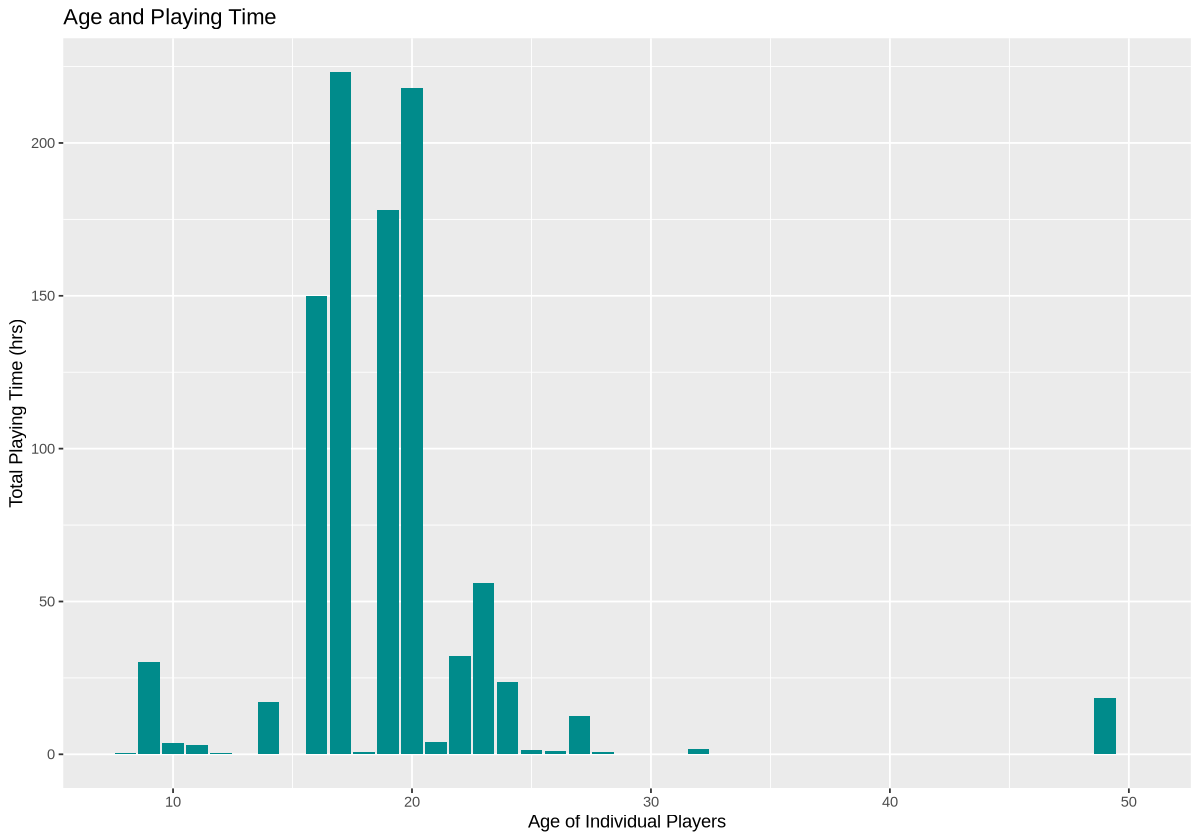

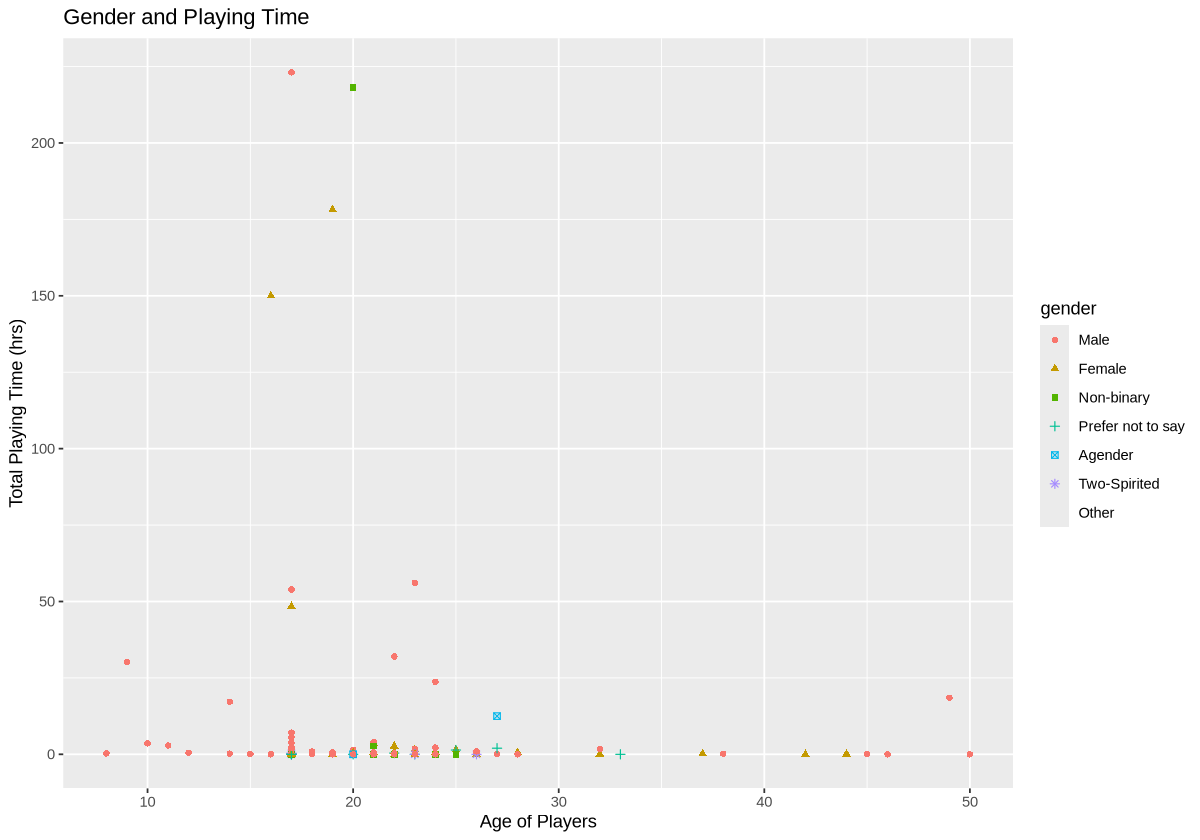

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


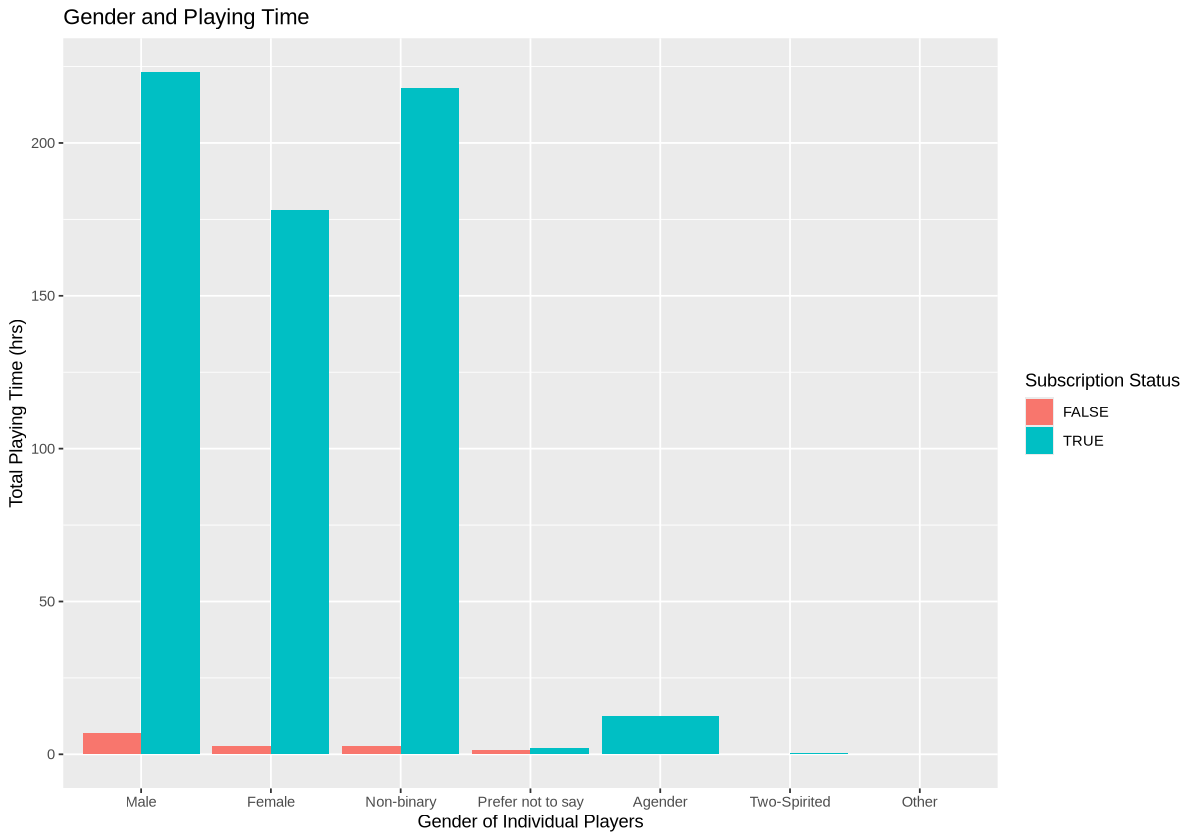

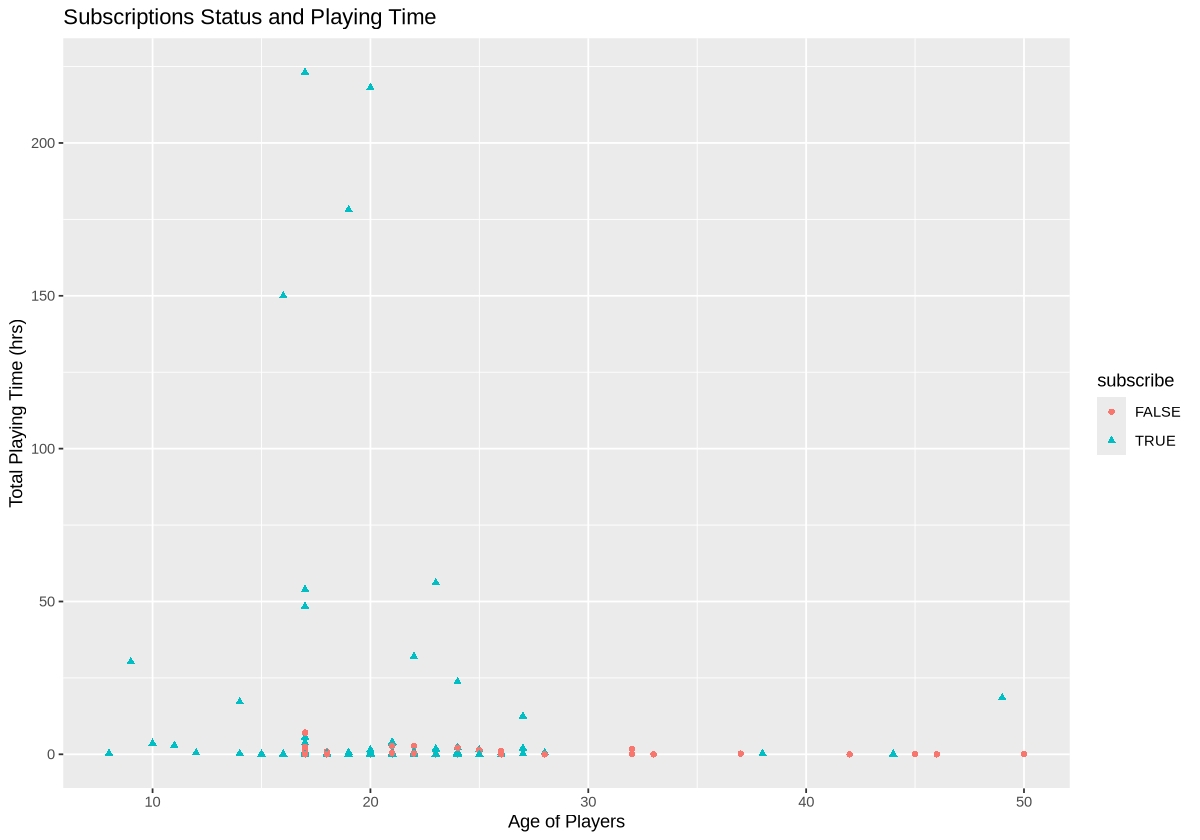

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


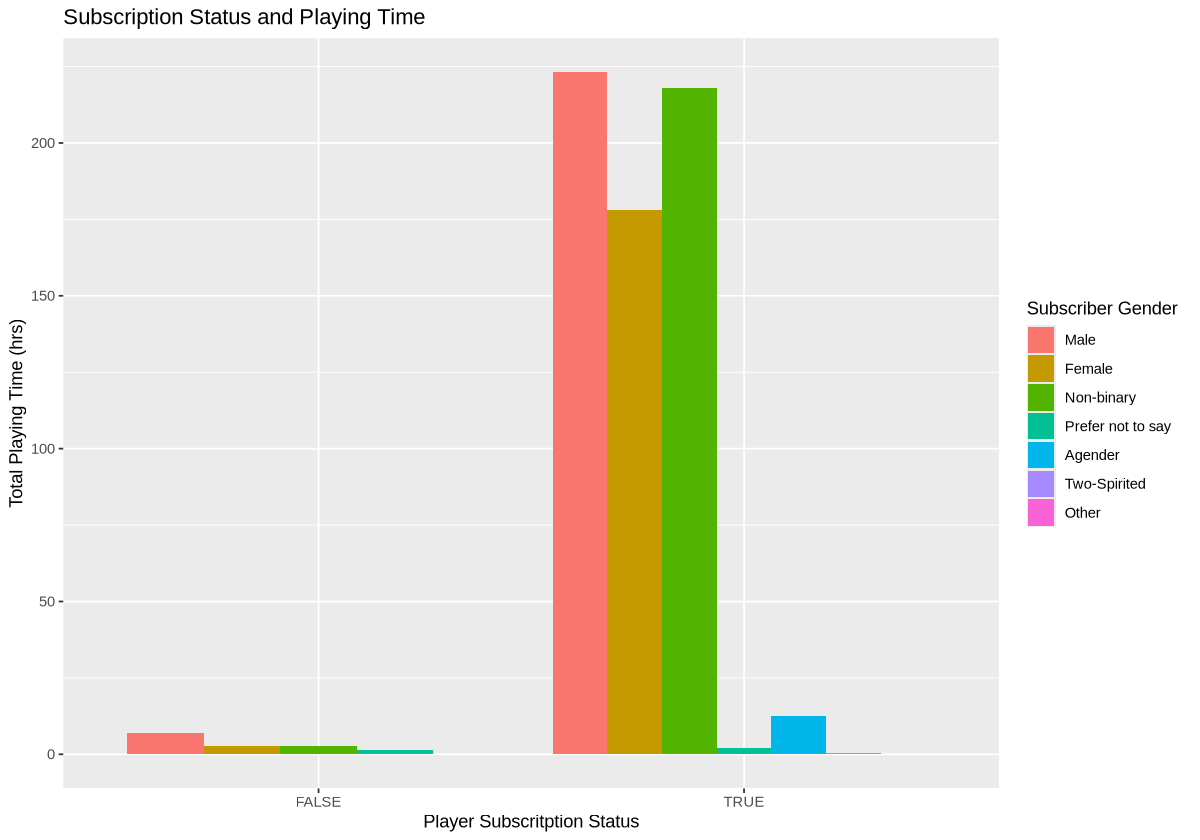

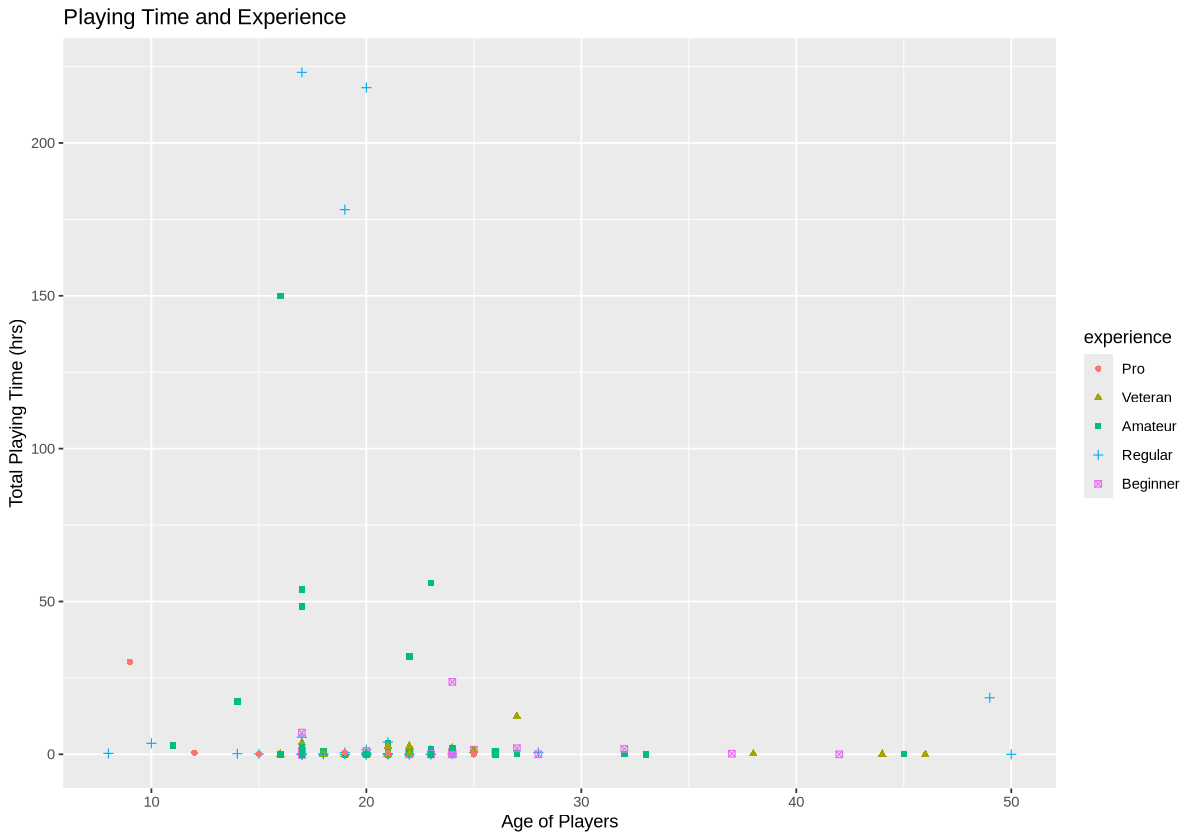

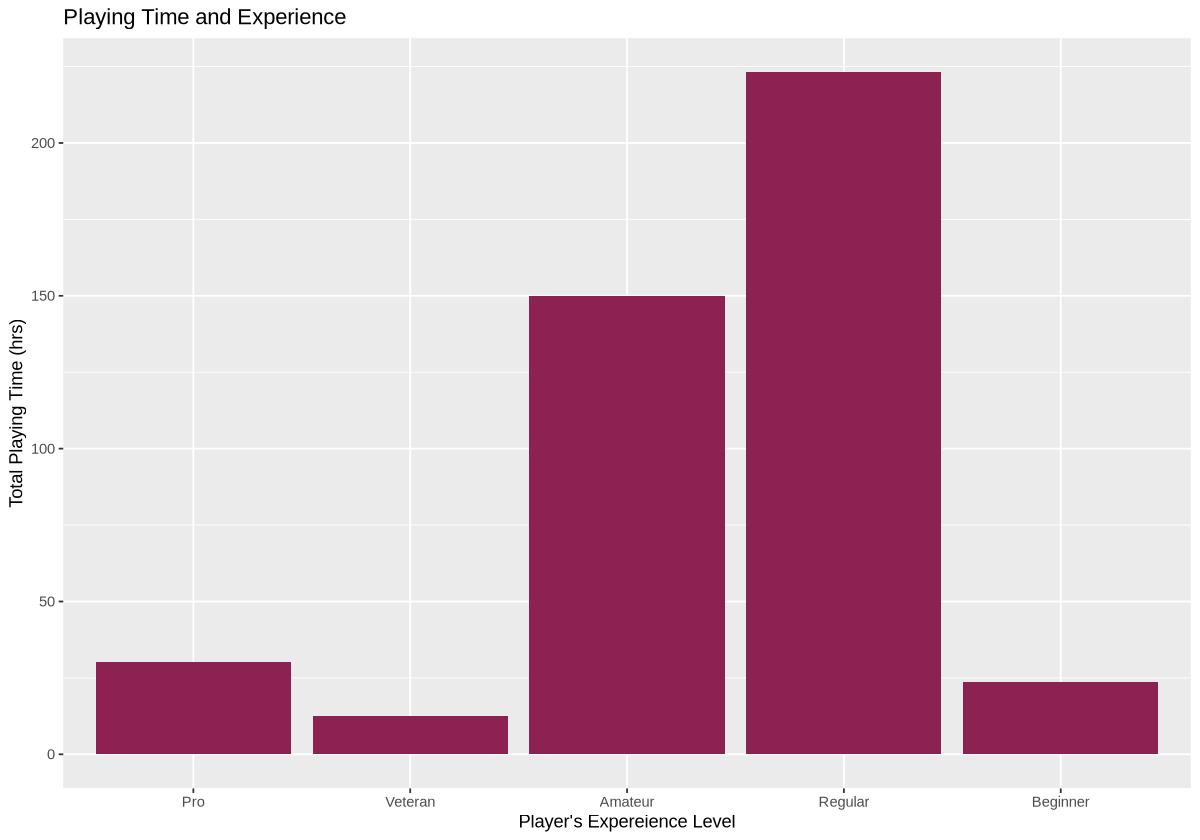

In [36]:
options(repr.plot.width = 10 , repr.plot.height = 7) 


age_gen <- ggplot(player_data, 
                    aes(x = gender, y = Age, fill = experience)) +
  geom_bar(position = "dodge", stat = "identity") +
  labs(y = "Age of Players", x = "Gender of Player", 
       title = "Experience based on Gender", fill = "Experience") 


hours_age_spl <- ggplot(player_data, 
                    aes(x = Age, y = played_hours, color = gender, shape = gender)) +
  geom_point() +
  labs(x = "Age of Players", y = "Total Playing Time (hrs)", 
       title = "Relationship Between Age and Playing Time", fill = "Gender of Player") 



hours_age_bar <- ggplot(player_data, 
                    aes(x = Age, y = played_hours)) +
           geom_bar(stat = "identity", position = "dodge", fill = "cyan4") +
           labs(x = "Age of Individual Players", y = "Total Playing Time (hrs)", 
           title = "Age and Playing Time") 



hours_gen_sp <- ggplot(player_data, 
                    aes(x = Age, y = played_hours, color = gender, shape = gender)) +
  geom_point() +
  labs(x = "Age of Players", y = "Total Playing Time (hrs)", 
       title = "Gender and Playing Time", fill = "Gender") 


hours_gender <- ggplot(player_data, 
                    aes(x = gender, y = played_hours, fill = subscribe)) +
   geom_bar(position = "dodge", stat = "identity") +
  labs(x = "Gender of Individual Players", y = "Total Playing Time (hrs)", 
       title = "Gender and Playing Time", fill = "Subscription Status") 


hours_subsp <- ggplot(player_data, 
                    aes(x = Age, y = played_hours, color = subscribe, shape = subscribe)) +
  geom_point() +
  labs(x = "Age of Players", y = "Total Playing Time (hrs)", 
       title = "Subscriptions Status and Playing Time", fill = "Subscription Status") 


hours_sub <- ggplot(player_data, 
                    aes(x = subscribe, y = played_hours, fill = gender)) +
  geom_bar(position = "dodge", stat = "identity") +
  labs(x = "Player Subscritption Status", y = "Total Playing Time (hrs)", 
       title = "Subscription Status and Playing Time", fill = "Subscriber Gender") 


experi_age_sp <- ggplot(player_data, 
                    aes(x = Age, y = played_hours, color = experience, shape = experience)) +
  geom_point() +
  labs(x = "Age of Players", y = "Total Playing Time (hrs)", 
       title = "Playing Time and Experience", fill = "Experience") 
  
 
experi_age <- ggplot(player_data, 
                    aes(x = experience, y = played_hours)) +
  geom_bar(stat = "identity", position = "dodge", fill = "violetred4") +
  labs(x = "Player's Expereience Level", y = "Total Playing Time (hrs)", 
       title = "Playing Time and Experience", fill = "Gender") 


   
age_gen 
hours_age_spl
hours_age_bar
hours_gen_sp
hours_gender
hours_subsp
hours_sub
experi_age_sp
experi_age

Based on the scatterplots and bar graphs plotted above, 4 major observations can be made:

1. A large majority of players that identify as male and are more likely to dedicate their time playing
2. Congruent with the statistics summary, majority of dedicated players are in their early 20s
3. Those with a subscription status dedicate more playing time on average
4. On average, players who consider themselves regular in experience play more hours



### Methods

Based on the visualised observations made above, I propose the use of a classification model to predict which players are most dedicated to the game. Unlike the regression model, the classification model was made specifically to predict categorical values, which are a large quantity of this particular dataset. Using the various categories each player falls under and predicting such with the use of their playing times can effectively indicate which players are more likely to spend time on the game and ultimately allow the researchers to decide who to expend their recruiting efforts towards. Additionally, With the use of KNN Classification it is necessary that we make the assumption that points that are closer together on the graph are more likely to have similar values. 

Although this method is more logical (and useful) than KNN Regression there are still a few issues that may arise with its use. As seen on the graphs above there is a fairly large disparity in particular player’s gender, age, and subscription status. These imbalances could possibly affect the performance of the classifier, and should be taken into consideration when reading the prediction values. 

Therefore, in order to have a point of comparison, I will use the information given by the bar graphs to reference whether the predictions made by the classification model are congruent with the scatterplot observations, as well as using the statistical summaries to note cohesion in data patterns. The observations from the bar graphs and scatterplots will also provide information as to which values should be chosen to predict. 

To garner my results I will be using the following steps

1. Split the data into training, testing, and validation data 
2. Split the training data in to smaller sets (5 total)
3. Cross validate the outcomes (tune the K value to gain multiple accuracy outcomes)
4. Use the testing data to make a prediction

To further evaluate the accuracy and efficiency of the classifier I will also use the confusion matrix on the testing data to analyze its performance. 





